In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_train = pd.read_csv("/kaggle/input/driver-data/TRAIN.csv")
df_test  = pd.read_csv("/kaggle/input/driver-data/TEST.csv")

In [3]:
df_train.head()

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
0,130.1,-0.007,-0.006,-0.016,-1.576,-0.071,-2.981,2
1,90.7,-0.022,0.001,0.011,-1.520,-0.011,0.561,2
2,90.1,-0.001,-0.007,-0.027,-1.527,-0.034,1.834,1
3,140.1,0.017,-0.019,0.018,-1.576,0.018,-2.444,2
4,89.4,0.000,-0.011,-0.010,-1.602,0.012,-1.249,1


In [4]:
df_test.head()

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
0,100.2,-0.034,0.014,-0.067,-1.572,-0.031,3.139,2
1,87.9,0.022,-0.010,-0.009,-1.590,-0.017,1.186,1
2,123.0,-0.030,-0.027,-0.004,-1.539,-0.013,0.405,2
3,91.9,-0.092,0.004,-0.002,-1.563,-0.045,1.303,2
4,93.5,-0.013,0.003,-0.011,-1.619,0.022,-1.218,2


In [5]:
df_train.shape

(21152, 8)

In [6]:
df_test.shape

(5288, 8)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21152 entries, 0 to 21151
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Speed                      21152 non-null  float64
 1   Vertical_Acceleration      21152 non-null  float64
 2   Lateral_Acceleration       21152 non-null  float64
 3   Longitudinal_Acceleration  21152 non-null  float64
 4   Roll                       21152 non-null  float64
 5   Pitch                      21152 non-null  float64
 6   Yaw                        21152 non-null  float64
 7   Status                     21152 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.3 MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Speed                      5288 non-null   float64
 1   Vertical_Acceleration      5288 non-null   float64
 2   Lateral_Acceleration       5288 non-null   float64
 3   Longitudinal_Acceleration  5288 non-null   float64
 4   Roll                       5288 non-null   float64
 5   Pitch                      5288 non-null   float64
 6   Yaw                        5288 non-null   float64
 7   Status                     5288 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 330.6 KB


In [9]:
df_train.isnull().sum()

Speed                        0
Vertical_Acceleration        0
Lateral_Acceleration         0
Longitudinal_Acceleration    0
Roll                         0
Pitch                        0
Yaw                          0
Status                       0
dtype: int64

In [10]:
df_test.isnull().sum()

Speed                        0
Vertical_Acceleration        0
Lateral_Acceleration         0
Longitudinal_Acceleration    0
Roll                         0
Pitch                        0
Yaw                          0
Status                       0
dtype: int64

In [11]:
df_train.describe()

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
count,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000
mean,95.287755,-0.013738,-0.010609,-0.003830,-1.556740,-0.013732,-0.078486,1.573752
std,16.666151,0.026813,0.069536,0.029629,0.038775,0.074955,1.590678,0.494542
min,0.000000,-0.198000,-0.562000,-0.529000,-1.888000,-0.460000,-3.141000,1.000000
25%,85.700000,-0.027000,-0.014000,-0.015000,-1.580000,-0.027000,-1.120250,1.000000
50%,92.800000,-0.012000,-0.001000,-0.002000,-1.556000,-0.005000,-0.029000,2.000000
75%,105.000000,0.002000,0.013000,0.010000,-1.533000,0.015000,0.899000,2.000000
max,148.800000,0.164000,0.323000,0.142000,-1.223000,0.321000,3.141000,2.000000


In [12]:
df_test.describe()

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
count,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,95.124811,-0.013840,-0.013164,-0.003671,-1.557019,-0.014693,-0.064474,1.568457
std,16.210107,0.027939,0.074437,0.029142,0.038145,0.079322,1.552911,0.495338
min,0.000000,-0.188000,-0.541000,-0.365000,-1.833000,-0.458000,-3.141000,1.000000
25%,85.800000,-0.027000,-0.015000,-0.014000,-1.580000,-0.026000,-1.032250,1.000000
50%,92.800000,-0.012000,-0.001000,-0.002000,-1.556000,-0.004000,-0.027500,2.000000
75%,104.700000,0.002000,0.012000,0.010000,-1.532000,0.015000,0.855750,2.000000
max,147.000000,0.148000,0.301000,0.117000,-1.362000,0.320000,3.141000,2.000000


In [13]:
df_train

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
0,130.1,-0.007,-0.006,-0.016,-1.576,-0.071,-2.981,2
1,90.7,-0.022,0.001,0.011,-1.520,-0.011,0.561,2
2,90.1,-0.001,-0.007,-0.027,-1.527,-0.034,1.834,1
3,140.1,0.017,-0.019,0.018,-1.576,0.018,-2.444,2
4,89.4,0.000,-0.011,-0.010,-1.602,0.012,-1.249,1
...,...,...,...,...,...,...,...,...
21147,75.0,-0.016,-0.008,-0.004,-1.534,-0.063,1.512,1
21148,90.5,0.001,-0.019,-0.005,-1.517,-0.075,-1.082,2
21149,87.7,-0.005,-0.010,-0.020,-1.563,-0.019,-0.998,1
21150,91.5,0.001,-0.013,0.007,-1.572,0.025,0.328,1


In [14]:
df_test

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
0,100.2,-0.034,0.014,-0.067,-1.572,-0.031,3.139,2
1,87.9,0.022,-0.010,-0.009,-1.590,-0.017,1.186,1
2,123.0,-0.030,-0.027,-0.004,-1.539,-0.013,0.405,2
3,91.9,-0.092,0.004,-0.002,-1.563,-0.045,1.303,2
4,93.5,-0.013,0.003,-0.011,-1.619,0.022,-1.218,2
...,...,...,...,...,...,...,...,...
5283,80.6,-0.031,-0.009,-0.014,-1.537,-0.024,0.909,2
5284,87.6,-0.013,0.035,0.008,-1.641,-0.014,0.494,1
5285,83.7,-0.096,-0.035,-0.023,-1.602,-0.055,2.523,1
5286,92.6,-0.020,0.003,-0.001,-1.544,-0.043,0.928,2


In [15]:
df = pd.concat([df_train,df_test],ignore_index=True)

In [16]:
df

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
0,130.1,-0.007,-0.006,-0.016,-1.576,-0.071,-2.981,2
1,90.7,-0.022,0.001,0.011,-1.520,-0.011,0.561,2
2,90.1,-0.001,-0.007,-0.027,-1.527,-0.034,1.834,1
3,140.1,0.017,-0.019,0.018,-1.576,0.018,-2.444,2
4,89.4,0.000,-0.011,-0.010,-1.602,0.012,-1.249,1
...,...,...,...,...,...,...,...,...
26435,80.6,-0.031,-0.009,-0.014,-1.537,-0.024,0.909,2
26436,87.6,-0.013,0.035,0.008,-1.641,-0.014,0.494,1
26437,83.7,-0.096,-0.035,-0.023,-1.602,-0.055,2.523,1
26438,92.6,-0.020,0.003,-0.001,-1.544,-0.043,0.928,2


In [17]:
df.to_csv("Final_df1.csv")

In [18]:
df.head()

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
0,130.1,-0.007,-0.006,-0.016,-1.576,-0.071,-2.981,2
1,90.7,-0.022,0.001,0.011,-1.520,-0.011,0.561,2
2,90.1,-0.001,-0.007,-0.027,-1.527,-0.034,1.834,1
3,140.1,0.017,-0.019,0.018,-1.576,0.018,-2.444,2
4,89.4,0.000,-0.011,-0.010,-1.602,0.012,-1.249,1


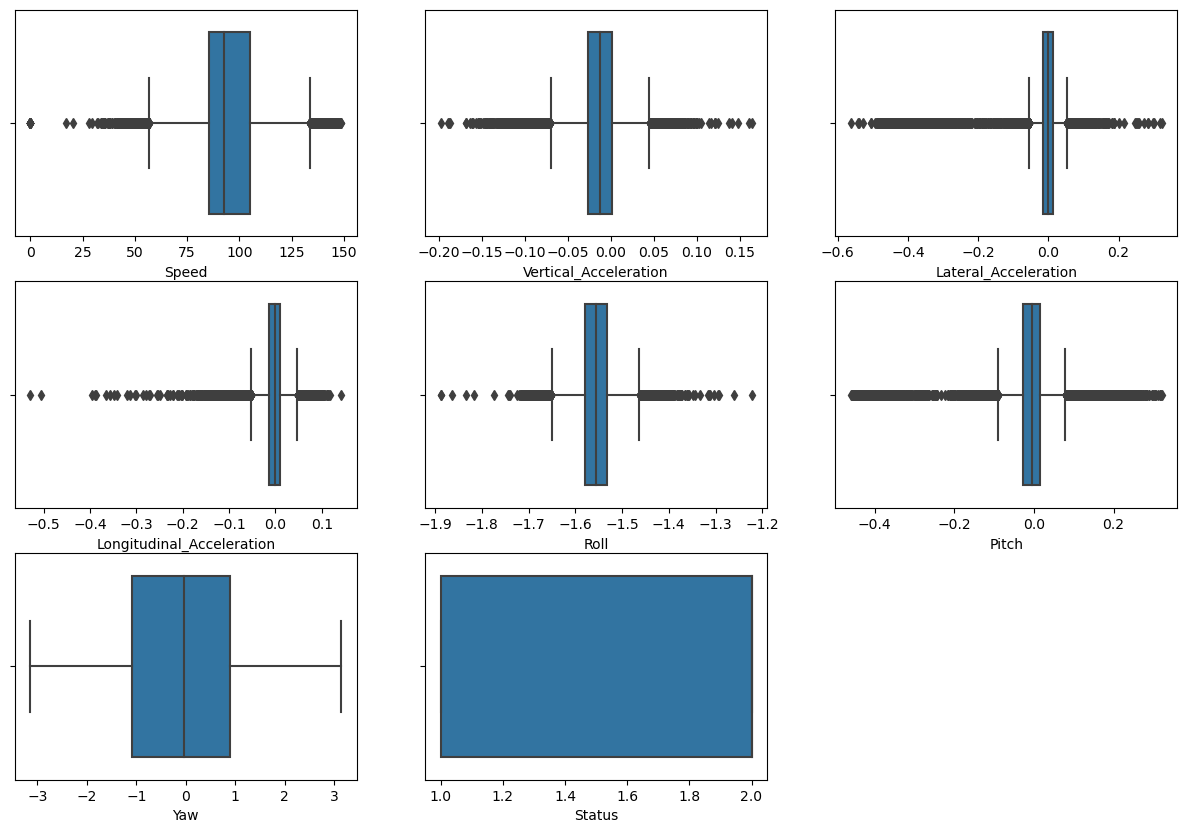

In [19]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[j])

In [20]:
df.describe()

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
count,26440.000000,26440.000000,26440.000000,26440.000000,26440.000000,26440.000000,26440.000000,26440.000000
mean,95.255166,-0.013758,-0.011120,-0.003798,-1.556796,-0.013924,-0.075683,1.572693
std,16.575771,0.027041,0.070549,0.029532,0.038649,0.075848,1.583178,0.494697
min,0.000000,-0.198000,-0.562000,-0.529000,-1.888000,-0.460000,-3.141000,1.000000
25%,85.700000,-0.027000,-0.014000,-0.015000,-1.580000,-0.027000,-1.094000,1.000000
50%,92.800000,-0.012000,-0.001000,-0.002000,-1.556000,-0.005000,-0.028000,2.000000
75%,104.900000,0.002000,0.013000,0.010000,-1.533000,0.015000,0.895000,2.000000
max,148.800000,0.164000,0.323000,0.142000,-1.223000,0.321000,3.141000,2.000000


In [21]:
df

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw,Status
0,130.1,-0.007,-0.006,-0.016,-1.576,-0.071,-2.981,2
1,90.7,-0.022,0.001,0.011,-1.520,-0.011,0.561,2
2,90.1,-0.001,-0.007,-0.027,-1.527,-0.034,1.834,1
3,140.1,0.017,-0.019,0.018,-1.576,0.018,-2.444,2
4,89.4,0.000,-0.011,-0.010,-1.602,0.012,-1.249,1
...,...,...,...,...,...,...,...,...
26435,80.6,-0.031,-0.009,-0.014,-1.537,-0.024,0.909,2
26436,87.6,-0.013,0.035,0.008,-1.641,-0.014,0.494,1
26437,83.7,-0.096,-0.035,-0.023,-1.602,-0.055,2.523,1
26438,92.6,-0.020,0.003,-0.001,-1.544,-0.043,0.928,2


In [22]:
y = df['Status']
x = df.drop('Status',axis=1)

In [23]:
df["Status"].unique()

array([2, 1])

In [24]:
x

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw
0,130.1,-0.007,-0.006,-0.016,-1.576,-0.071,-2.981
1,90.7,-0.022,0.001,0.011,-1.520,-0.011,0.561
2,90.1,-0.001,-0.007,-0.027,-1.527,-0.034,1.834
3,140.1,0.017,-0.019,0.018,-1.576,0.018,-2.444
4,89.4,0.000,-0.011,-0.010,-1.602,0.012,-1.249
...,...,...,...,...,...,...,...
26435,80.6,-0.031,-0.009,-0.014,-1.537,-0.024,0.909
26436,87.6,-0.013,0.035,0.008,-1.641,-0.014,0.494
26437,83.7,-0.096,-0.035,-0.023,-1.602,-0.055,2.523
26438,92.6,-0.020,0.003,-0.001,-1.544,-0.043,0.928


In [25]:
y

0        2
1        2
2        1
3        2
4        1
        ..
26435    2
26436    1
26437    1
26438    2
26439    2
Name: Status, Length: 26440, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train , X_test ,y_train ,y_test = train_test_split(x , y , test_size = 0.3 ,random_state = 20)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns, index=X_test.index)   

In [30]:
X_train.head()

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw
15389,-0.096149,0.730930,0.269854,0.056484,0.327640,0.370071,0.350250
23600,1.694920,0.546366,0.212800,-0.218951,0.275606,0.144596,-0.499980
2292,-0.023538,0.214150,0.098692,-0.528815,1.472390,-0.876675,-0.831963
3189,-0.374491,0.767843,0.055901,-0.287809,0.978066,0.118069,1.075670
277,0.684418,-0.376457,0.013111,-0.012374,0.405692,0.343545,-1.724641


In [31]:
X_test.head()

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw
8028,0.424229,0.435627,0.084428,0.194202,0.587811,-0.266565,-1.008091
8618,1.059574,0.509453,-0.086734,-0.115662,-1.701687,0.277228,-0.729960
19340,-0.162709,0.214150,-0.043943,0.435207,0.041453,0.224175,-1.921677
18235,-0.326084,-0.524108,0.526597,0.194202,0.353657,0.330281,0.250149
7337,-1.185313,0.361801,0.084428,0.022055,-1.831773,-0.200249,-0.543062


In [32]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

In [33]:
y

array([1, 1, 0, ..., 0, 1, 1])

In [34]:
y_train.head()

15389    2
23600    1
2292     1
3189     2
277      1
Name: Status, dtype: int64

In [35]:
y_test.head()

8028     1
8618     2
19340    2
18235    1
7337     2
Name: Status, dtype: int64

In [36]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)

SVC()

In [37]:
svm_train_pred = model.predict(X_train)

In [38]:
svm_train_pred[:5]

array([1, 1, 1, 1, 1])

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,svm_train_pred)

array([[5610, 2368],
       [3607, 6923]])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,svm_train_pred)*100

67.7166630646207

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_train,svm_train_pred))

              precision    recall  f1-score   support

           1       0.61      0.70      0.65      7978
           2       0.75      0.66      0.70     10530

    accuracy                           0.68     18508
   macro avg       0.68      0.68      0.68     18508
weighted avg       0.69      0.68      0.68     18508



In [42]:
svm_test_pred = model.predict(X_test)

In [43]:
svm_test_pred[:5]

array([1, 2, 2, 1, 1])

In [44]:
confusion_matrix(y_test,svm_test_pred)

array([[2189, 1131],
       [1631, 2981]])

In [45]:
accuracy_score(y_test,svm_test_pred)*100

65.1790216843167

In [46]:
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           1       0.57      0.66      0.61      3320
           2       0.72      0.65      0.68      4612

    accuracy                           0.65      7932
   macro avg       0.65      0.65      0.65      7932
weighted avg       0.66      0.65      0.65      7932



In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc=RandomForestClassifier(criterion='entropy')

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [50]:
rfc_train_pred = rfc.predict(X_train)

In [51]:
rfc_train_pred[:5]

array([2, 1, 1, 2, 1])

In [52]:
confusion_matrix(y_train,rfc_train_pred)

array([[ 7978,     0],
       [    0, 10530]])

In [53]:
accuracy_score(y_train,rfc_train_pred)*100

100.0

In [54]:
print(classification_report(y_train, rfc_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7978
           2       1.00      1.00      1.00     10530

    accuracy                           1.00     18508
   macro avg       1.00      1.00      1.00     18508
weighted avg       1.00      1.00      1.00     18508



In [55]:
rfc_test_pred = rfc.predict(X_test)
rfc_test_pred[:5]

array([1, 2, 2, 1, 2])

In [56]:
confusion_matrix(y_test,rfc_test_pred)


array([[2511,  809],
       [ 814, 3798]])

In [57]:
accuracy_score(y_test,rfc_test_pred)*100

79.53857791225415